# Project Title: Car Price Prediction
## Outline 
- Creating a car-price prediction project with a linear regression model 
- Performing an initial exploratory data analysis with Jupyter notebook
- Setting up a validation framework
- Implementing the linear regression model and other regression model 
- Performing feature engineering for the model 
- Keeping the model under control with regularization 
- Using the model to predict car prices

## Project Description
The aim of this project is to develop a machine learning model that can accurately predict the price of a car based on various features such as make, model, mileage, year, and other relevant factors. The project will involve collecting a dataset of car listings with associated prices and features from online sources or existing databases. Data preprocessing steps will be implemented to clean and prepare the dataset for modeling, including handling missing values, encoding categorical variables, and scaling numerical features.

Next, various machine learning algorithms such as linear regression, decision trees, random forests, and gradient boosting will be trained and evaluated using techniques like cross-validation and hyperparameter tuning to identify the best-performing model. Feature importance analysis will also be conducted to understand which features have the most significant impact on the predicted car prices.

The developed model will be deployed into a user-friendly interface, allowing users to input car features and obtain a predicted price estimate. Additionally, the project will include documentation detailing the steps involved in data collection, preprocessing, modeling, evaluation, and deployment, making it accessible for others to understand and replicate.

## Dataset Description 

### Dataset Url 
- ttps://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge

### Attributes
- ID
- Price: price of the car(Target Column)
- Levy
- Manufacturer
- Model
- Prod. year
- Category
- Leather interior
- Fuel type
- Engine volume
- Mileage
- Cylinders
- Gear box type
- Drive wheels
- Doors
- Wheel
- Color
- Airbags


## Outline 
- Creating a car-price prediction project with a linear regression model 
- Performing an initial exploratory data analysis with Jupyter notebook
- Setting up a validation framework
- Implementing the linear regression model and other regression model 
- Performing feature engineering for the model 
- Keeping the model under control with regularization 
- Using the model to predict car prices

## Project Description
The aim of this project is to develop a machine learning model that can accurately predict the price of a car based on various features such as make, model, mileage, year, and other relevant factors. The project will involve collecting a dataset of car listings with associated prices and features from online sources or existing databases. Data preprocessing steps will be implemented to clean and prepare the dataset for modeling, including handling missing values, encoding categorical variables, and scaling numerical features.

Next, various machine learning algorithms such as linear regression, decision trees, random forests, and gradient boosting will be trained and evaluated using techniques like cross-validation and hyperparameter tuning to identify the best-performing model. Feature importance analysis will also be conducted to understand which features have the most significant impact on the predicted car prices.

The developed model will be deployed into a user-friendly interface, allowing users to input car features and obtain a predicted price estimate. Additionally, the project will include documentation detailing the steps involved in data collection, preprocessing, modeling, evaluation, and deployment, making it accessible for others to understand and replicate.

## Dataset Description 

### Dataset Url 
- https://www.kaggle.com/code/jshih7/car-price-prediction?select=data.csv


### Attributes

- make: make of a car (BMW, Toyota, and so on)
- model: model of a car
- year: year when the car was manufactured
- engine_fuel_type: type of fuel the engine needs (diesel, electric, and so on)
- engine_hp: horsepower of the engine
- engine_cylinders: number of cylinders in the engine
- transmission_type: type of transmission (automatic or manual)
- driven_wheels: front, rear, all
- number_of_doors: number of doors a car has
- market_category: luxury, crossover, and so on
- vehicle_size: compact, midsize, or large
- vehicle_style: sedan or convertible
- highway_mpg: miles per gallon (mpg) on the highway
- city_mpg: miles per gallon in the city
- popularity: number of times the car was mentioned in a Twitter stream
- msrp: manufacturer’s suggested retail price


## Importing Libraries


In [6]:
## loading and preprocessing data
import numpy as np
import pandas as pd 

## visualization of data
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## splitting our dataset 
from sklearn.model_selection import train_test_split

## loading the learning alg
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#feature engineering
from sklearn.feature_extraction import DictVectorizer

import warnings
warnings.filterwarnings('ignore')
## loading the error metrics
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error,mean_squared_error

## Loading Data 

In [7]:
## loading dataset

data = pd.read_csv("car_price_datatset.csv.xls")

## create a copy 
df = data.copy()

## Data Preview And Understanding
- Loading the dataset

In [8]:
## view the first rows 
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
## view the last five rows 
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [10]:
df.shape

(11914, 16)

In [11]:
## check the number of rows and columns 
print(f'Total number of rows: {df.shape[0]} -> Total number of columns: {df.shape[1]}')

Total number of rows: 11914 -> Total number of columns: 16


In [12]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [13]:
#df.Engine HP

In [14]:
## get a summary description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [15]:
df['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [16]:
## checking for missing values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [17]:
## checking for duplicated values 
df.duplicated().sum()

np.int64(715)

In [18]:
## checking type on columns
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [19]:
## lets return the total counts of unique values in each column 
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [20]:
## finding unique instances in each column 
df['Engine Cylinders'].unique()


array([ 6.,  4.,  5.,  8., 12.,  0., nan, 10.,  3., 16.])

In [21]:
## finding unique instances in each column 
df['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [22]:
## finding unique instances in each column 
# df['Engine HP'].unique()

## usually the output can determine if you dealing with a category with unique instances or not

In [23]:
# ## finding unique instances in each column 
# df['']

In [24]:
## finding unique instances in each column 
# print(np.nunique(df['Market Category']))

## Data preprocessing 
- replacing unsual characters with NaN values
- Drop the Id column
- Normalizing column names
- Filling of missing 

In [25]:
##change column names to lower case and replace spaces with underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [26]:
df.engine_hp

0        335.0
1        300.0
2        300.0
3        230.0
4        230.0
         ...  
11909    300.0
11910    300.0
11911    300.0
11912    300.0
11913    221.0
Name: engine_hp, Length: 11914, dtype: float64

In [27]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [28]:
## lets fill in col for engine_hp 

df['engine_hp'] = df['engine_hp'].fillna(df['engine_hp'].mean())
df['engine_hp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11914 entries, 0 to 11913
Series name: engine_hp
Non-Null Count  Dtype  
--------------  -----  
11914 non-null  float64
dtypes: float64(1)
memory usage: 93.2 KB


In [29]:
## lets fill in col for engine_cylinders and number of doors
df['engine_cylinders'] = df['engine_cylinders'].fillna(df['engine_cylinders'].mean())
df['number_of_doors'] = df['number_of_doors'].fillna(df['number_of_doors'].mean().round())

df['engine_cylinders'] = df['engine_cylinders'].astype('int64')
df['number_of_doors'] = df['number_of_doors'].astype('int64')
df['msrp'] = df['msrp'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11914 non-null  float64
 5   engine_cylinders   11914 non-null  int64  
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11914 non-null  int64  
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  float64
dtypes: float64(2), int64(6

## Descriptive Analysis
- statistical summary

In [30]:
df.describe().round()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.0,11914.0,11914.0,11914.0,11914.0,11914.0,11914.0,11914.0
mean,2010.0,249.0,6.0,3.0,27.0,20.0,1555.0,40595.0
std,8.0,109.0,2.0,1.0,9.0,9.0,1442.0,60109.0
min,1990.0,55.0,0.0,2.0,12.0,7.0,2.0,2000.0
25%,2007.0,170.0,4.0,2.0,22.0,16.0,549.0,21000.0
50%,2015.0,227.0,6.0,4.0,26.0,18.0,1385.0,29995.0
75%,2016.0,300.0,6.0,4.0,30.0,22.0,2009.0,42231.0
max,2017.0,1001.0,16.0,4.0,354.0,137.0,5657.0,2065902.0


## Exploratory Data Analysis
- Target variable analysis
- Plot a correlation against the target variable
- Outlier analysis

In [31]:
df['msrp'][df['msrp'] < 1000000]

0        46135.0
1        40650.0
2        36350.0
3        29450.0
4        34500.0
          ...   
11909    46120.0
11910    56670.0
11911    50620.0
11912    50920.0
11913    28995.0
Name: msrp, Length: 11908, dtype: float64

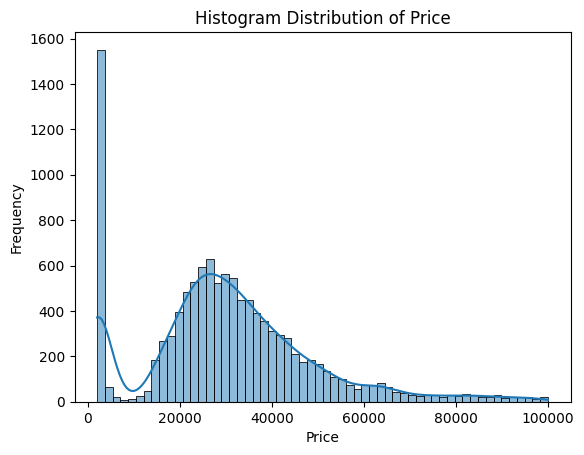

In [32]:

sns.histplot(df['msrp'][df['msrp'] < 100000], kde= True)

plt.title('Histogram Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

In [33]:
## log transformation 
log_price = np.log1p(df['msrp'])
log_price

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

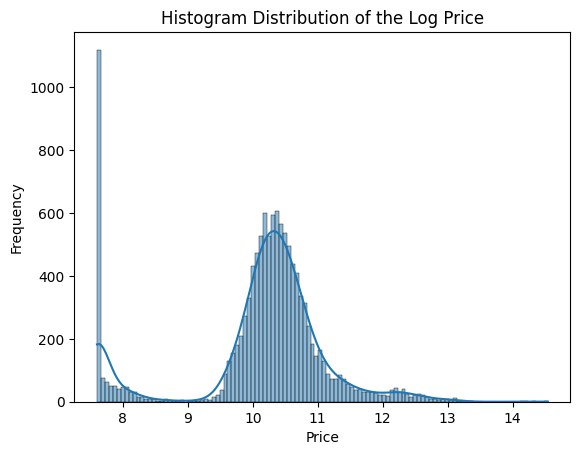

In [34]:
sns.histplot(log_price, kde = True)

plt.title('Histogram Distribution of the Log Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()


In [35]:
## performing a coorelation on numerical column
## select numerical ..
numerical_cols = df.select_dtypes(exclude=[object])

corr_matrix = numerical_cols.corr() 

corr_matrix['msrp']

year                0.227590
engine_hp           0.661644
engine_cylinders    0.531365
number_of_doors    -0.126843
highway_mpg        -0.160043
city_mpg           -0.157676
popularity         -0.048476
msrp                1.000000
Name: msrp, dtype: float64

<Axes: >

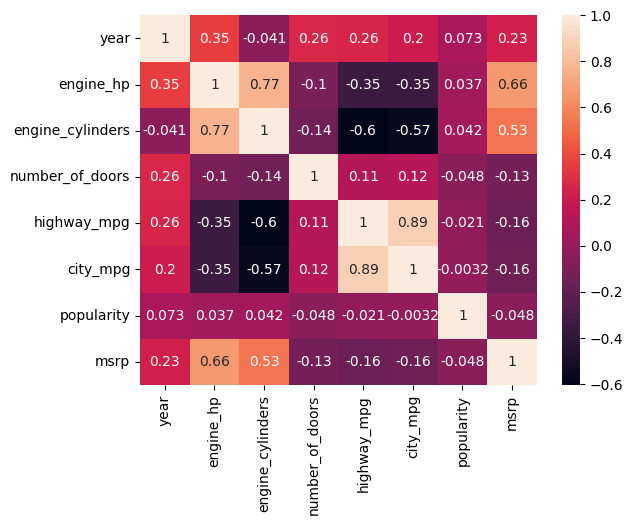

In [36]:
sns.heatmap(corr_matrix, annot= True)

<Axes: xlabel='year'>

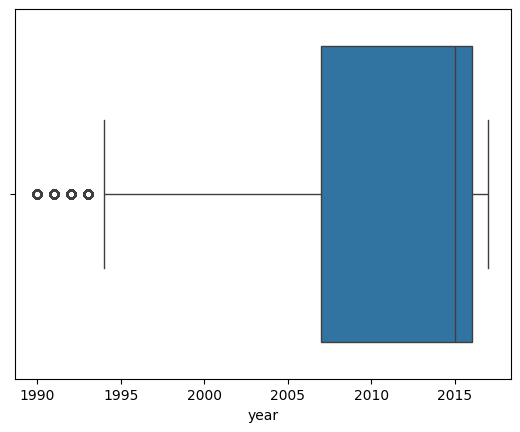

In [37]:
## 
sns.boxplot(data=df, x='year')

In [38]:
mmode = df['engine_fuel_type'].mode()[0]
df['market_category'] = df['market_category'].fillna(method = 'bfill')
df['engine_fuel_type'] = df['engine_fuel_type'].fillna(value= mmode)

## Building A Validation Framework / Splitting Dataset
- Training set 60 %
- Validation dataset 20%
- Test dataset 20%


In [39]:
x, y = 5,10
print(x)

5


In [40]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
print(df.shape)
print(df_train_full.shape)


(11914, 16)
(9531, 16)


In [41]:
df_train_full.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3144,Chevrolet,Cruze Limited,2016,regular unleaded,138.0,4,AUTOMATIC,front wheel drive,4,Diesel,Midsize,Sedan,39,26,1385,21470.0
7514,Nissan,Pathfinder,2015,regular unleaded,260.0,6,AUTOMATIC,front wheel drive,4,Crossover,Large,4dr SUV,27,20,2009,29510.0
10116,Suzuki,Swift,2001,regular unleaded,79.0,4,MANUAL,front wheel drive,2,Hatchback,Compact,2dr Hatchback,38,31,481,10299.0
4993,Nissan,Frontier,2016,regular unleaded,261.0,6,MANUAL,four wheel drive,4,Hybrid,Compact,Crew Cab Pickup,21,16,2009,28890.0
11194,GMC,Vandura,1994,regular unleaded,165.0,6,AUTOMATIC,rear wheel drive,3,"Exotic,High-Performance",Midsize,Cargo Van,20,15,549,2000.0


In [42]:
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=11) 

print(f'Train set {len(df_train)}')
print(f'Valid set {len(df_valid)}')
print(f'Test set {len(df_test)}')


Train set 7148
Valid set 2383
Test set 2383


In [43]:
df_valid.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
6562,Lexus,LX 470,2007,regular unleaded,268.00000,8,AUTOMATIC,four wheel drive,4,Luxury,Midsize,4dr SUV,15,12,454,67395.0
6298,Buick,LaCrosse,2015,flex-fuel (unleaded/E85),304.00000,6,AUTOMATIC,all wheel drive,4,"Flex Fuel,Performance",Large,Sedan,26,17,155,40500.0
10989,Toyota,Tundra,2016,regular unleaded,310.00000,8,AUTOMATIC,rear wheel drive,4,Flex Fuel,Large,Crew Cab Pickup,19,15,2031,33270.0
5926,Acura,Integra,2000,regular unleaded,170.00000,4,MANUAL,front wheel drive,4,"Luxury,Performance",Compact,Sedan,28,22,204,3622.0
6934,Tesla,Model S,2016,electric,249.38607,0,DIRECT_DRIVE,all wheel drive,3,"Exotic,Performance",Large,Sedan,107,101,1391,71000.0


In [44]:
np.log1p(df['msrp']).values

array([10.73934884, 10.61277871, 10.50097699, ..., 10.83212179,
       10.83803069, 10.27491317])

In [45]:
## selecting target column and converting it to a vector format
y_train = np.log1p(df_train['msrp']).values
y_valid = np.log1p(df_valid['msrp']).values
y_test = np.log1p(df_test['msrp']).values
y_train_full = np.log1p(df_train_full['msrp']).values

In [46]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
579,FIAT,500L,2016,premium unleaded (recommended),160.0,4,MANUAL,front wheel drive,4,Crossover,Compact,Wagon,33,25,819,19495.0
732,BMW,7 Series,2017,premium unleaded (required),445.0,8,AUTOMATIC,rear wheel drive,4,"Luxury,High-Performance",Large,Sedan,26,17,3916,94600.0
8729,Chevrolet,S-10 Blazer,1993,regular unleaded,165.0,6,MANUAL,rear wheel drive,2,Performance,Compact,2dr SUV,22,16,1385,2000.0
11781,Cadillac,XTS,2016,regular unleaded,304.0,6,AUTOMATIC,front wheel drive,4,"Luxury,Performance",Large,Sedan,28,18,1624,64550.0
5177,Pontiac,G5,2008,regular unleaded,148.0,4,MANUAL,front wheel drive,2,Performance,Compact,Coupe,33,24,210,15675.0


In [47]:
del df_train['msrp']
del df_valid['msrp']
del df_test['msrp']
del df_train_full['msrp']

In [48]:
df_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
8428,Acura,RDX,2016,premium unleaded (recommended),279.0,6,AUTOMATIC,front wheel drive,4,"Crossover,Luxury",Midsize,4dr SUV,29,20,204
11661,Suzuki,XL-7,2004,regular unleaded,185.0,6,MANUAL,four wheel drive,4,Crossover,Midsize,4dr SUV,20,15,481
4001,GMC,Envoy XL,2006,regular unleaded,291.0,6,AUTOMATIC,rear wheel drive,4,"Exotic,High-Performance",Large,4dr SUV,19,14,549
2904,Lincoln,Continental,2017,regular unleaded,305.0,6,AUTOMATIC,all wheel drive,4,Luxury,Large,Sedan,24,16,61
11722,Suzuki,XL7,2009,regular unleaded,252.0,6,AUTOMATIC,all wheel drive,4,Crossover,Midsize,4dr SUV,23,16,481


In [49]:
df.number_of_doors.unique()

array([2, 4, 3])

## Train A Baseline Regression Model
- Selecting baseline features (pandas dataframe)
    - engine_hp
    - engine_cylinders
    - highway_mpg
    - city_mpg
    - popularity
    - number_of_doors
- convert dataframe to matrix/vector format
- Train a regression model

In [50]:
list = ['make','model']
df_train[list]

,make,model
579,FIAT,500L
732,BMW,7 Series
8729,Chevrolet,S-10 Blazer
11781,Cadillac,XTS
5177,Pontiac,G5
...,...,...
2524,Chevrolet,City Express
3424,Dodge,Dakota
11299,Hyundai,Veracruz
10625,Chevrolet,TrailBlazer


In [51]:

baseline_features = ['engine_hp', 'engine_cylinders','city_mpg','highway_mpg', 'popularity','number_of_doors']



df_train_bl = df_train[baseline_features]
df_valid_bl = df_valid[baseline_features]

In [52]:
df_train_bl.head()

,engine_hp,engine_cylinders,city_mpg,highway_mpg,popularity,number_of_doors
579,160.0,4,25,33,819,4
732,445.0,8,17,26,3916,4
8729,165.0,6,16,22,1385,2
11781,304.0,6,18,28,1624,4
5177,148.0,4,24,33,210,2


In [53]:
df_train_bl.isnull().sum()

engine_hp           0
engine_cylinders    0
city_mpg            0
highway_mpg         0
popularity          0
number_of_doors     0
dtype: int64

In [54]:
df_valid_bl.isnull().sum()

engine_hp           0
engine_cylinders    0
city_mpg            0
highway_mpg         0
popularity          0
number_of_doors     0
dtype: int64

In [55]:
## convert dataframes to pandas array 
X_train_bl = df_train_bl.values
X_train_bl

array([[1.600e+02, 4.000e+00, 2.500e+01, 3.300e+01, 8.190e+02, 4.000e+00],
       [4.450e+02, 8.000e+00, 1.700e+01, 2.600e+01, 3.916e+03, 4.000e+00],
       [1.650e+02, 6.000e+00, 1.600e+01, 2.200e+01, 1.385e+03, 2.000e+00],
       ...,
       [2.600e+02, 6.000e+00, 1.700e+01, 2.200e+01, 1.439e+03, 4.000e+00],
       [3.900e+02, 8.000e+00, 1.200e+01, 1.600e+01, 1.385e+03, 4.000e+00],
       [2.700e+02, 6.000e+00, 1.800e+01, 2.600e+01, 4.540e+02, 4.000e+00]])

In [56]:
## lets train model 
model = LinearRegression() 
model.fit(X_train_bl, y_train)


LinearRegression()

In [57]:
model.coef_

array([ 9.40716654e-03, -1.47100209e-01,  2.97008643e-03,  1.54145534e-02,
       -1.09790766e-05,  1.94237630e-01])

In [58]:
model.intercept_

np.float64(7.480694111507684)

## Model Evaluation
- Generate the validation predictions
- Compare the validation predictions to the actual predictions
- Return an accuracy score
  

In [59]:
df_valid_bl.head()

,engine_hp,engine_cylinders,city_mpg,highway_mpg,popularity,number_of_doors
6562,268.00000,8,12,15,454,4
6298,304.00000,6,17,26,155,4
10989,310.00000,8,15,19,2031,4
5926,170.00000,4,22,28,204,4
6934,249.38607,0,101,107,1391,3


In [60]:
## generate validation baseline features 
df_valid_bl = df_valid[baseline_features]

## convert dataframe into numpy array
X_valid_bl = df_valid_bl.values 

X_valid_bl

array([[2.680e+02, 8.000e+00, 1.200e+01, 1.500e+01, 4.540e+02, 4.000e+00],
       [3.040e+02, 6.000e+00, 1.700e+01, 2.600e+01, 1.550e+02, 4.000e+00],
       [3.100e+02, 8.000e+00, 1.500e+01, 1.900e+01, 2.031e+03, 4.000e+00],
       ...,
       [4.000e+02, 6.000e+00, 1.900e+01, 2.700e+01, 1.715e+03, 2.000e+00],
       [2.400e+02, 4.000e+00, 2.200e+01, 3.400e+01, 3.916e+03, 4.000e+00],
       [1.700e+02, 4.000e+00, 2.500e+01, 3.800e+01, 8.730e+02, 4.000e+00]])

In [61]:
## generate our validation prediction
y_valid_pred = model.predict(X_valid_bl)
print(y_valid_pred[0:10])
print(y_valid[0:10])

[ 9.86383843 10.68439011 10.3121939   9.76317177 12.34348734  9.48780773
  9.14078021  9.91460212 10.12700997 10.27444438]
[11.11834095 10.60908194 10.41244143  8.19505769 11.17044924  8.07464908
 10.0556076  10.60413156 10.0668811  10.63611983]


In [62]:
## compute the validation baseline accuracy for 
rmse =  root_mean_squared_error(y_valid, y_valid_pred)
mse =  mean_squared_error(y_valid, y_valid_pred)
print(f'Baseline Validation Accuracy RMSE: {rmse} and MSE: {mse}')

Baseline Validation Accuracy RMSE: 0.7357766350474935 and MSE: 0.5413672566818124


The code prints 0.75. This number tells us that on average, the model’s predictions
are off by 0.75. This result alone may not be very useful, but we can use it to compare
this model with other models. If one model has a better (lower) RMSE than the other,
it indicates that model is better.

In [63]:
#help(DictVectorizer)

In [64]:
adjRsq_acc = r2_score(y_valid,y_valid_pred)
adjRsq_acc

0.5512903348880414

In [65]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders       int64
transmission_type     object
driven_wheels         object
number_of_doors        int64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                 float64
dtype: object

Feature Engineering
Convert categorical data to numerical using one-hot encoding

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11914 non-null  object 
 4   engine_hp          11914 non-null  float64
 5   engine_cylinders   11914 non-null  int64  
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11914 non-null  int64  
 9   market_category    11914 non-null  object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  float64
dtypes: float64(2), int64(6

In [67]:
df.vehicle_size.unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [68]:
## select categoricals 
categorical_features = ['make','model', 'engine_fuel_type', 'transmission_type', 'driven_wheels','market_category','vehicle_size','vehicle_style' ]
numerical_features = ['engine_hp', 'engine_cylinders','city_mpg', 'popularity','number_of_doors']


In [ ]:
df[categorical_features + numerical_features]

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style,engine_hp,engine_cylinders,city_mpg,popularity,number_of_doors
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,335.0,6,19,3916,2
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,300.0,6,19,3916,2
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,300.0,6,20,3916,2
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,230.0,6,18,3916,2
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible,230.0,6,18,3916,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,300.0,6,16,204,4
11910,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,300.0,6,16,204,4
11911,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,300.0,6,16,204,4
11912,Acura,ZDX,premium unleaded (recommended),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,300.0,6,16,204,4


In [70]:
df_train[categorical_features + numerical_features].columns

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style',
       'engine_hp', 'engine_cylinders', 'city_mpg', 'popularity',
       'number_of_doors'],
      dtype='object')

In [71]:
## combine of dataframe
df_train_fe = df_train[categorical_features + numerical_features]
df_train_fe.head()

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style,engine_hp,engine_cylinders,city_mpg,popularity,number_of_doors
579,FIAT,500L,premium unleaded (recommended),MANUAL,front wheel drive,Crossover,Compact,Wagon,160.0,4,25,819,4
732,BMW,7 Series,premium unleaded (required),AUTOMATIC,rear wheel drive,"Luxury,High-Performance",Large,Sedan,445.0,8,17,3916,4
8729,Chevrolet,S-10 Blazer,regular unleaded,MANUAL,rear wheel drive,Performance,Compact,2dr SUV,165.0,6,16,1385,2
11781,Cadillac,XTS,regular unleaded,AUTOMATIC,front wheel drive,"Luxury,Performance",Large,Sedan,304.0,6,18,1624,4
5177,Pontiac,G5,regular unleaded,MANUAL,front wheel drive,Performance,Compact,Coupe,148.0,4,24,210,2


In [72]:
## convert our dataframe to a list of dict
train_dict_fe = df_train_fe.to_dict(orient='records')


In [73]:
## create an instance of the dict vectorizer 
dv = DictVectorizer()

dv.fit(train_dict_fe)

DictVectorizer()

In [74]:
x_train_fe = dv.transform(train_dict_fe)
x_train_fe

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 92924 stored elements and shape (7148, 1038)>

In [75]:
## combine of dataframe
df_valid_fe = df_valid[categorical_features + numerical_features]
df_valid_fe.head()

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style,engine_hp,engine_cylinders,city_mpg,popularity,number_of_doors
6562,Lexus,LX 470,regular unleaded,AUTOMATIC,four wheel drive,Luxury,Midsize,4dr SUV,268.00000,8,12,454,4
6298,Buick,LaCrosse,flex-fuel (unleaded/E85),AUTOMATIC,all wheel drive,"Flex Fuel,Performance",Large,Sedan,304.00000,6,17,155,4
10989,Toyota,Tundra,regular unleaded,AUTOMATIC,rear wheel drive,Flex Fuel,Large,Crew Cab Pickup,310.00000,8,15,2031,4
5926,Acura,Integra,regular unleaded,MANUAL,front wheel drive,"Luxury,Performance",Compact,Sedan,170.00000,4,22,204,4
6934,Tesla,Model S,electric,DIRECT_DRIVE,all wheel drive,"Exotic,Performance",Large,Sedan,249.38607,0,101,1391,3


In [76]:
## convert our dataframe to a list of dict
valid_dict_fe = df_valid_fe.to_dict(orient='records')

In [77]:
x_valid_fe = dv.transform(valid_dict_fe)
x_valid_fe

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30930 stored elements and shape (2383, 1038)>

In [78]:
#Fitting the Linear Regression Machine Learning model
fe_model = LinearRegression()
fe_model.fit(x_train_fe, y_train)

LinearRegression()

In [79]:
fe_model.intercept_

np.float64(8.508580914807998)

In [80]:
fe_model.coef_

array([ 0.0314158 ,  0.02504196,  0.07069906, ..., -0.14013192,
       -0.09965424, -0.13602431])

In [81]:
## lets generate validation predictions
y_valid_predict = fe_model.predict(x_valid_fe) 
print(y_valid[0:10])
print(y_valid_predict[0:10])

[11.11834095 10.60908194 10.41244143  8.19505769 11.17044924  8.07464908
 10.0556076  10.60413156 10.0668811  10.63611983]
[11.02383121 10.60933226 10.28506636  8.82276263 11.47115299  8.8685314
  9.91317989 10.77843808 10.18636203 10.379879  ]


In [82]:
## compute the validation baseline accuracy for 
rmse =  root_mean_squared_error(y_valid, y_valid_predict)
mse =  mean_squared_error(y_valid, y_valid_predict)
print(f'Baseline Validation Accuracy RMSE: {rmse} and MSE: {mse}')

Baseline Validation Accuracy RMSE: 0.26650317752626396 and MSE: 0.07102394363159537


In [83]:
adjRsq_acc = r2_score(y_valid,y_valid_predict)
adjRsq_acc

0.9411321435337661

In [84]:
# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(x_train_fe, y_train)

RandomForestRegressor(random_state=42)

In [85]:
# generate validation predictions
predictions = random_forest.predict(x_valid_fe)

# Calculate Mean Squared Error
rsquared_acc = r2_score(y_valid, predictions)
rsquared_acc

0.9412027044304764

In [86]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

NameError: name 'x_train' is not defined